# Seminario de Lenguajes - Python
## Cursaa 2023
### Introducción al análisis de datos

# Ciencia de datos:

> En pocas palabras: se refiere al análisis de datos aplicando  técnicas de programación
<center>
<img src="imagenes/analisis_de_datos.png" alt="analisis de datos" style="width:750px;"/>
</center>

Sacado de [Ciencia de Datos para Gente Sociable](https://bitsandbricks.github.io/ciencia_de_datos_gente_sociable/index.html), aunque trabaja con lenguaje R la introducción es un buen punto de partida.

# Análisis de datos

- Algo muy básico hicimos cuando procesamos datasets en formato csv.
- Ahora veremos una de las librerías más utilizadas en Python: [pandas](https://pandas.pydata.org/)
- Vamos a graficar resultados con [matplotlib](https://matplotlib.org/) y alguna más que veremos más adelante.


# Empecemos con pandas

- Se instalan con **pip**.
- Hay muchos ejemplos con Jupyter lab / Jupyter notebook.


# Procesamos pokemones

## Primero con las herramientas vistas hasta ahora

In [70]:
import csv

In [71]:
archivo_pokemon= "Pokemon.csv"
with open(archivo_pokemon, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    encabezado, datos = next(reader), list(reader)

In [72]:
for item in encabezado:
    print(item, end=" - ")

# - Name - Type 1 - Type 2 - Total - HP - Attack - Defense - Sp. Atk - Sp. Def - Speed - Generation - Legendary - 

In [73]:
for item in datos[:5]:
    print(item)

['1', 'Bulbasaur', 'Grass', 'Poison', '318', '45', '49', '49', '65', '65', '45', '1', 'False']
['2', 'Ivysaur', 'Grass', 'Poison', '405', '60', '62', '63', '80', '80', '60', '1', 'False']
['3', 'Venusaur', 'Grass', 'Poison', '525', '80', '82', '83', '100', '100', '80', '1', 'False']
['3', 'VenusaurMega Venusaur', 'Grass', 'Poison', '625', '80', '100', '123', '122', '120', '80', '1', 'False']
['4', 'Charmander', 'Fire', '', '309', '39', '52', '43', '60', '50', '65', '1', 'False']


# ¿Cuántos pokemones de fuego tenemos?

In [74]:
fuego = list(filter(lambda x: (x[2]=="Fire" or x[3]=="Fire"), datos))

In [75]:
len(fuego)

64

Mostramos algunos ...

In [76]:
for item in fuego[:3]:
    print(item)

['4', 'Charmander', 'Fire', '', '309', '39', '52', '43', '60', '50', '65', '1', 'False']
['5', 'Charmeleon', 'Fire', '', '405', '58', '64', '58', '80', '65', '80', '1', 'False']
['6', 'Charizard', 'Fire', 'Flying', '534', '78', '84', '78', '109', '85', '100', '1', 'False']


# Queremos listar los mejores pokemones: ¿total mayor a 700?

Deberíamos trabajar con la columna Total (columna 4)
- IMPORTANTE: recordamos que un csv es un **archivo de texto**.

In [77]:
pokes_mejores = filter(lambda x: float(x[4])>700, datos)

In [78]:
for poke in pokes_mejores:
    print(poke[1])

MewtwoMega Mewtwo X
MewtwoMega Mewtwo Y
KyogrePrimal Kyogre
GroudonPrimal Groudon
RayquazaMega Rayquaza
Arceus


¿Qué pasa si volvemos a ejecutar el código anterior? ¿Por qué?

# Ahora vamos a usar pandas

In [79]:
import pandas as pd

In [80]:
data_set = pd.read_csv(archivo_pokemon, encoding='utf-8')

In [81]:
data_set

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# ¿De qué tipo de datos es data_set?

In [82]:
type(data_set)

pandas.core.frame.DataFrame

- Un **dataframe** es una de las estructuras más importantes con las que trabaja pandas. 
- Es una **"estructura tabular bidimensional, de tamaño mutable y potencialmente heterogénea"**.


- Un dataframe contiene:
    - datos: organizados en filas y columnas
    - labels: asociados a las filas y a las columnas
- En nuestro ejemplo: ¿cuáles son los datos? ¿Y los labels?

In [83]:
data_set.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [84]:
data_set.index

RangeIndex(start=0, stop=800, step=1)

# Algunas operaciones sencillas

¿Cuántas filas?

In [85]:
len(data_set)

800

¿Cuántas filas y columnas?

In [86]:
data_set.shape

(800, 13)

# Un resumen del dataFrame

Podemos usar **info()** para obtener un resumen que indica si las columnas contienen valores nulos,  **qué tipo de dato**  pandas le asignó, etc.

- IMPORTANTE: recordamos que un csv es un **archivo de texto**.


In [ ]:
data_set.info()

Recordemos que el archivo csv es un archivo de texto. ¿Qué hizo pandas al leerlo?

# Queremos saber los tipos de pokemones que hay en el data set
- Vamos a filtrar por la columna **Type 1**

In [87]:
data_set["Type 1"]

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 800, dtype: object

# ¿Y si queremos que no aparezcan valores repetidos?

In [88]:
data_set["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

# Podemos ver cuántos pokemones hay de  cada tipo:

In [ ]:
data_set["Type 1"].value_counts()

# ¿De qué tipo son las columnas?

In [89]:
columna = data_set["Type 1"]

In [90]:
type(columna)

pandas.core.series.Series

# Series

- Es la otra estructura de datos básica  con las que trabaja pandas.
- **Poseen un índice que se define implícitamente**. Este índice implícito indica la **posición del elemento en la Series**.

In [91]:
columna[0]

'Grass'

# También es posible definir un índice de otro tipo

In [92]:
# Top 3 de PYPL (PopularitY of Programming Language) https://pypl.github.io/PYPL.html
# Otras fuentes: https://www.tiobe.com/tiobe-index/  (aunque no es el mismo)
top_3 = pd.Series(
       [27.27, 16.35, 9.52],
       index=["Python", "Java", "JavaScript" ]
       )
top_3

Python        27.27
Java          16.35
JavaScript     9.52
dtype: float64

In [93]:
top_3["Python"]

27.27

# Otras formas de crear un DataFrame
Fuente de los datos: https://es.wikipedia.org/wiki/Anexo:R%C3%A9cords_del_ATP_World_Tour

In [94]:
datos = {
        'tenista': ['Novak Djokovic', 'Rafael Nadal', 'Roger Federer', 'Ivan Lendl', 'Pete Sampras', 'John McEnroe', 'Bjorn Borg'],
        'pais': ['Serbia', 'España', 'Suiza', 'República Checa','Estados Unidos', 'Estados Unidos', 'Suecia'],
        'gran_slam': [22, 22, 20, 8, 14, 7, 11],
        'master_1000': [38, 36, 28, 22, 11, 19, 15],
        'otros': [6, 1, 6, 5, 5, 3, 2]
         }
labels_filas = ["H01", "H02", "H03", "H04", "H05", "H06", "H07"]

In [95]:
df = pd.DataFrame(data=datos, index=labels_filas)

In [96]:
df

,tenista,pais,gran_slam,master_1000,otros
H01,Novak Djokovic,Serbia,22,38,6
H02,Rafael Nadal,España,22,36,1
H03,Roger Federer,Suiza,20,28,6
H04,Ivan Lendl,República Checa,8,22,5
H05,Pete Sampras,Estados Unidos,14,11,5
H06,John McEnroe,Estados Unidos,7,19,3
H07,Bjorn Borg,Suecia,11,15,2


In [97]:
tenistas = df["tenista"]
tenistas

H01    Novak Djokovic
H02      Rafael Nadal
H03     Roger Federer
H04        Ivan Lendl
H05      Pete Sampras
H06      John McEnroe
H07        Bjorn Borg
Name: tenista, dtype: object

<center>
<img src="imagenes/basicos_pandas.png" alt="analisis de datos" style="width:850px;"/>
</center>

# Podemos acceder a una fila del dataframe

In [98]:
fila = df.loc["H03"]
fila

tenista        Roger Federer
pais                   Suiza
gran_slam                 20
master_1000               28
otros                      6
Name: H03, dtype: object

In [99]:
fila["tenista"]

'Roger Federer'

¿De qué tipo es fila?

In [100]:
type(fila)

pandas.core.series.Series

<center>
<img src="imagenes/basicos_pandas1.png" alt="analisis de datos" style="width:850px;"/>
</center>

# Queremos ver  los datos de la  primera fila:

In [101]:
fila1 = df.iloc[0]
fila1["tenista"]

'Novak Djokovic'

- **loc**: por label.
- **iloc**: or indice entero.

# O a un conjunto:

In [102]:
# Por filas 
#df.iloc[2:4]
#df.loc["H03":"H06"] #, "tenista"]
df.loc["H03":"H06", "tenista":"pais"]

,tenista,pais
H03,Roger Federer,Suiza
H04,Ivan Lendl,República Checa
H05,Pete Sampras,Estados Unidos
H06,John McEnroe,Estados Unidos


In [103]:
# Por columnas
df[["tenista","master_1000"]]

,tenista,master_1000
H01,Novak Djokovic,38
H02,Rafael Nadal,36
H03,Roger Federer,28
H04,Ivan Lendl,22
H05,Pete Sampras,11
H06,John McEnroe,19
H07,Bjorn Borg,15


# O a un dato específico:

In [104]:
el_mejor = df.at["H03","tenista"]
el_mejor

'Roger Federer'

# Probar en casa...

In [105]:
# Por filas y columnas
df.iloc[[0, 2],[2, 3]]
#df.iloc[:,[2, 3]]
#df.iloc[[x for x in range(0,len(df)) if x % 2 == 0], [0,1]]
#df.iloc[:,[True, True, False, False, True]]
#df.iloc[lambda x: x.index == "H03", [0,2]]

,gran_slam,master_1000
H01,22,38
H03,20,28


- Más info en la [documentación oficial](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc)
- Investigar: ¿cómo usamos **loc** para acceder a estos mismos datos?

# Queremos saber qué tenistas ganaron más de 19 Gran Slam

In [106]:
df[df["gran_slam"] >= 20]

,tenista,pais,gran_slam,master_1000,otros
H01,Novak Djokovic,Serbia,22,38,6
H02,Rafael Nadal,España,22,36,1
H03,Roger Federer,Suiza,20,28,6


## ¿Y si queremos sólo a  Roger? 

In [107]:
df[(df["gran_slam"] >= 20) & (df["pais"] == "Suiza")]

,tenista,pais,gran_slam,master_1000,otros
H03,Roger Federer,Suiza,20,28,6


# Retomemos el trabajo con nuestro dataset de pokemones

> Queremos todos los pokemones de fuego  con ataque mayor a 100 

In [108]:
# Recordemos la estructura del dataset
data_set.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Empecemos por filtrar los pokemones de fuego

In [109]:
pokes_fuego = data_set[(data_set["Type 1"] == "Fire" ) | (data_set["Type 2"] == "Fire")]
pokes_fuego

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False


# Otra forma: usando loc

In [110]:
pokes_fuego = data_set.loc[(data_set['Type 1'] == 'Fire') | (data_set['Type 2'] == 'Fire')]
pokes_fuego

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False


# Y ahora filtramos por el ataque

In [111]:
pokes_poderosos = pokes_fuego[pokes_fuego["Attack"]>=100]
pokes_poderosos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
84,78,Rapidash,Fire,NaN,500,65,100,70,80,80,105,1,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False


# O podemos hacerlo todo junto

In [112]:
pokes_fuego = data_set[
    ((data_set["Type 1"] == "Fire" ) | (data_set["Type 2"] == "Fire")) & 
    (pokes_fuego["Attack"]>=100)]
pokes_fuego

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
84,78,Rapidash,Fire,NaN,500,65,100,70,80,80,105,1,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False


# Podemos guardar el dataframe en archivos

In [113]:
# En formato csv
pokes_fuego.to_csv("Pokemones_fuego.csv")

In [114]:
# En formato json
pokes_fuego.to_json("Pokemones_fuego.json", indent=4)

# Queremos saber los 10  pokemones de fuego con mayor poder de ataque

In [115]:
pokes_fuego = data_set.loc[(data_set['Type 1'] == 'Fire') | (data_set['Type 2'] == 'Fire')]
pokes_fuego

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False


# Y, ¿cómo podemos obtener los 10 pokemones de fuego con más ataque?

In [116]:
#Ordenamos y nos quedamos con los 10 primeros
super_pokes = pokes_fuego.sort_values(by='Attack', ascending=False).head()
super_pokes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
615,555,DarmanitanStandard Mode,Fire,NaN,480,105,140,55,30,55,95,5,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False


# Y ahora graficamos: usamos matplotlib


In [117]:
import matplotlib

In [119]:
from matplotlib import pyplot as plt


<Axes: >

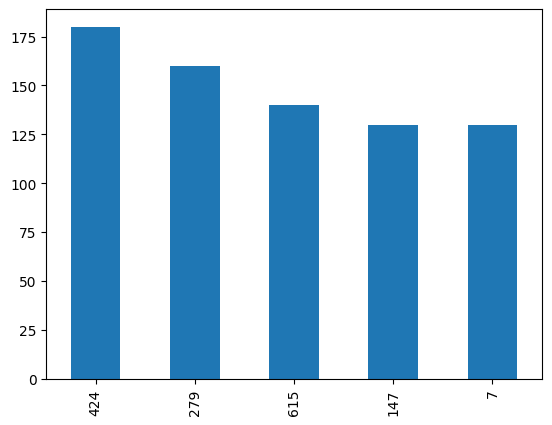

In [120]:
#super_pokes.index = super_pokes["Name"]
super_pokes["Attack"]. plot(kind="bar")


# Desafío

> Queremos ver los 5 tipos (Type 1) de pokemones con más exponentes. 

In [121]:
pokes_tipo1 = data_set["Type 1"].value_counts().sort_values(ascending=False)
pokes_tipo1.head(10)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Name: Type 1, dtype: int64

**value_counts()** no  retorna los valores ordenados.  Para eso usamos **sort_values()**

<Axes: >

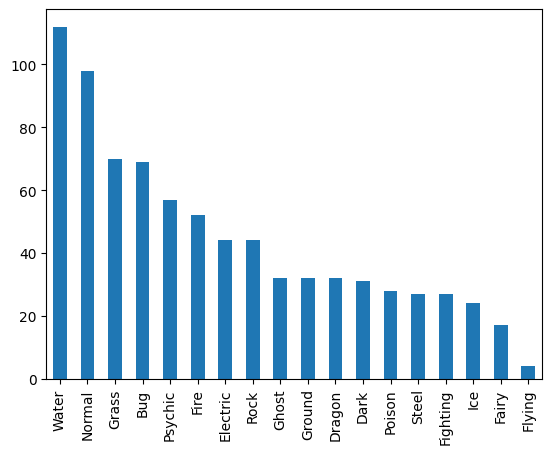

In [122]:
pokes_tipo1.plot(kind="bar")

In [123]:
etiquetas = list(pokes_tipo1.index)[:5]
etiquetas

['Water', 'Normal', 'Grass', 'Bug', 'Psychic']

In [124]:
data_dibujo = list(pokes_tipo1.values)[:5]
data_dibujo

[112, 98, 70, 69, 57]

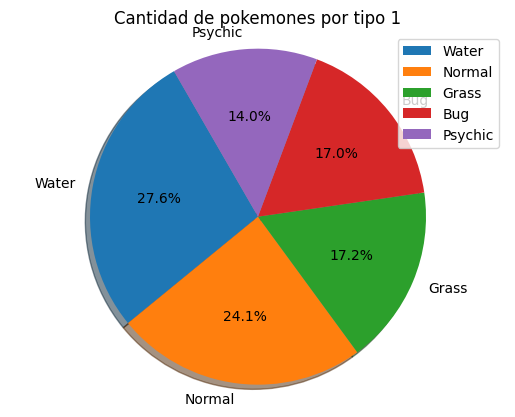

In [125]:
plt.pie(data_dibujo, labels=etiquetas, autopct='%1.1f%%',
        shadow=True, startangle=120, labeldistance= 1.1)
plt.axis('equal') 
plt.legend(etiquetas)

plt.title("Cantidad de pokemones por tipo 1")
plt.show()

# ¿Cómo podemos guardar el gráfico en un png?

In [126]:
plt.savefig('grafico.png', format="png")

<Figure size 640x480 with 0 Axes>

- Revisemos: ¿se grabó bien?

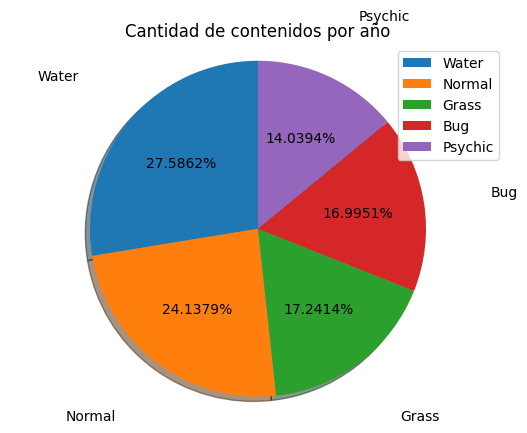

In [127]:
plt.pie(data_dibujo, labels=etiquetas, autopct='%1.4f%%',
        shadow=True, startangle=90, labeldistance= 1.4)
plt.axis('equal') 
plt.legend(etiquetas)

plt.title("Cantidad de contenidos por año")
plt.savefig('grafico.png', format="png")

plt.show()

In [ ]:
#Graba la imagen pero no se muestra en el noteebook

# Generar la visualización
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

# Guardar el gráfico en un archivo PNG sin mostrarlo en pantalla
plt.savefig('archivo.png', format='png')
plt.close()


# Resumimos hasta acá

- **pandas** me permite acceder y procesar datasets.
- Las dos estructuras más importantes: Series y DataFrame.
- Usamos matplotlib para  visualizar los gráficos.

# Tarea para el hogar...

## Desafío: 

> Resolver  con pandas el enunciado de la actividad 1 por Python plus

# Seguimos la próxima ...